In [6]:
#!pip install tensorflow-estimator==2.7

     -------------------------------------- 463.1/463.1 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.22.3 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.7.3 which is incompatible.
tensorflow 2.3.0 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.7.0 which is incompatible.


In [1]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14918348365140510517
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6006419242790610431
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8999199884
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6065067026410518045
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:b3:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9454083840809331550
physical_device_desc: "device: XLA_GPU device"
]


In [13]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" #-1 CPU

In [14]:
tf.debugging.set_log_device_placement(True)

In [38]:
# device_lib.list_local_devices()
# tf.config.list_physical_devices('GPU')

NameError: name 'device_lib' is not defined

In [27]:
import timeit
 
start_time = timeit.default_timer() # 시작 시간 체크
 
sum = 0
 
for i in range(100000000):
    sum += i
    
terminate_time = timeit.default_timer() # 종료 시간 체크  
 
print("%f초 걸렸습니다." % (terminate_time - start_time))

12.386680초 걸렸습니다.


In [1]:
import tensorflow as tf
tf.__version__

C:\Users\NIPA_ICTCoC\anaconda3\envs\tsf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.3.0'

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [4]:
# 폴더에서 이미지 불러오기
# IMG_DIR = 'D:/Ai/project/emotion_detection_dataset/fer2013/train/Angry/' #폴더 위치
# cnt = 1
# plt.figure(figsize = (30,30))
# for dirname, _, filenames in os.walk(IMG_DIR):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         if cnt >25:
#             continue
#         plt.subplot(5,5,cnt)
#         imgfile = dirname+'/'+filename
#         img = plt.imread(imgfile)
#         plt.imshow(img,cmap = 'bone')
#         plt.grid(False)
#         cnt += 1

In [28]:
dir = "C:/Ai/project/dataset/FacemaskDetector/dataset"

In [29]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               rotation_range=0.2, #random
                               width_shift_range=0.2, #좌우 이동
                               height_shift_range=0.2, #상하 이동
                               zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #????

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2) #train:test = 8:2

In [31]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 16269 images belonging to 3 classes.
Found 3318 images belonging to 3 classes.


In [32]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

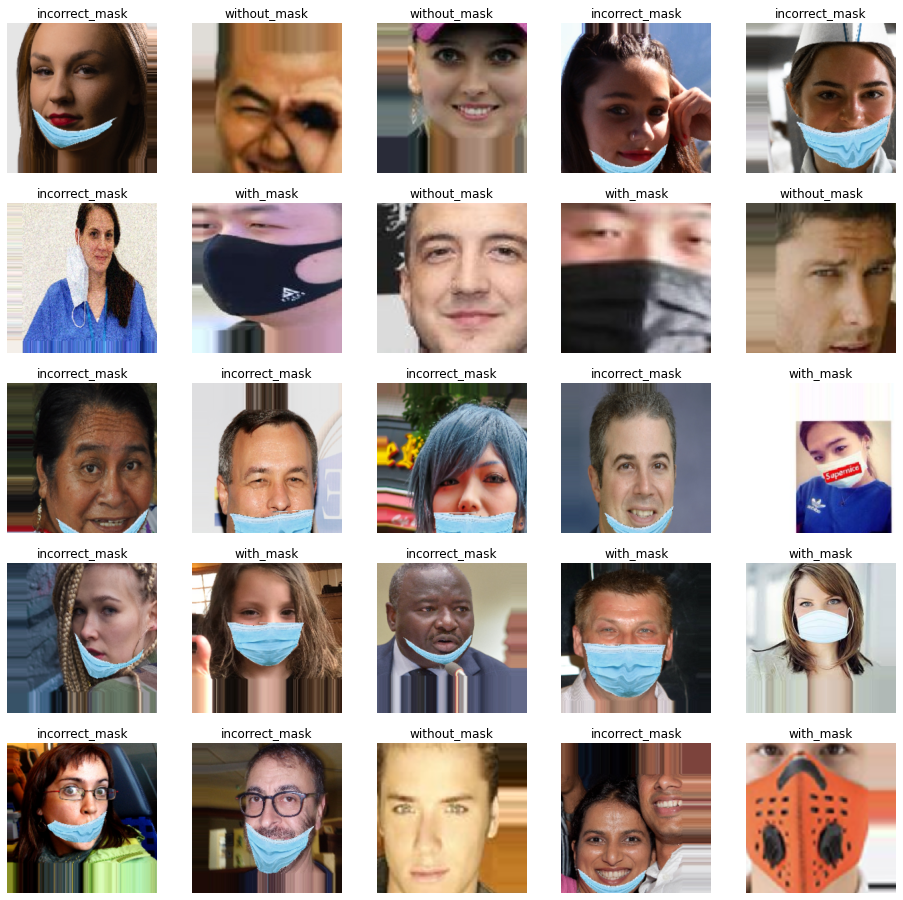

In [33]:
plt.figure(figsize = (16,16))

for i in range(25): #최대 25
  image,label = train_data.next()

  plt.subplot(5,5,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

In [34]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 223, 223, 64)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      16448     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 54, 54, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 46656)            

In [36]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [37]:
# fitting data to the model

hist = model.fit(train_data,
       epochs = 50,
       steps_per_epoch = len(train_data),
       validation_data = test_data,
       validation_steps = len(test_data))

Epoch 1/50
 59/509 [==>...........................] - ETA: 3:43 - loss: 1.1092 - accuracy: 0.4560

C:\Users\NIPA_ICTCoC\anaconda3\envs\tsf\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


509/509 [==============================] - 286s 561ms/step - loss: 0.6774 - accuracy: 0.7046 - val_loss: 0.5731 - val_accuracy: 0.8098
Epoch 2/50
509/509 [==============================] - 220s 433ms/step - loss: 0.4521 - accuracy: 0.8265 - val_loss: 0.5913 - val_accuracy: 0.7495
Epoch 3/50
509/509 [==============================] - 223s 439ms/step - loss: 0.3800 - accuracy: 0.8603 - val_loss: 0.3164 - val_accuracy: 0.8969
Epoch 4/50
509/509 [==============================] - 221s 435ms/step - loss: 0.3322 - accuracy: 0.8807 - val_loss: 0.3430 - val_accuracy: 0.8770
Epoch 5/50
509/509 [==============================] - 222s 435ms/step - loss: 0.3003 - accuracy: 0.8944 - val_loss: 0.2610 - val_accuracy: 0.9042
Epoch 6/50
509/509 [==============================] - 225s 443ms/step - loss: 0.2766 - accuracy: 0.9034 - val_loss: 0.3368 - val_accuracy: 0.8785
Epoch 7/50
509/509 [==============================] - 222s 435ms/step - loss: 0.2676 - accuracy: 0.9078 - val_loss: 0.2467 - val_accura

In [43]:
# fitting data to the model

hist = model.fit(train_data,
                 epochs = 1,
                 steps_per_epoch = len(train_data),
                 validation_data = test_data,
                 validation_steps = len(test_data))

509/509 [==============================] - 239s 470ms/step - loss: 0.1325 - accuracy: 0.9572 - val_loss: 0.1294 - val_accuracy: 0.9569


In [39]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

104/104 [==============================] - 16s 151ms/step - loss: 0.1085 - accuracy: 0.9623
Model Accuracy:  96.23 %


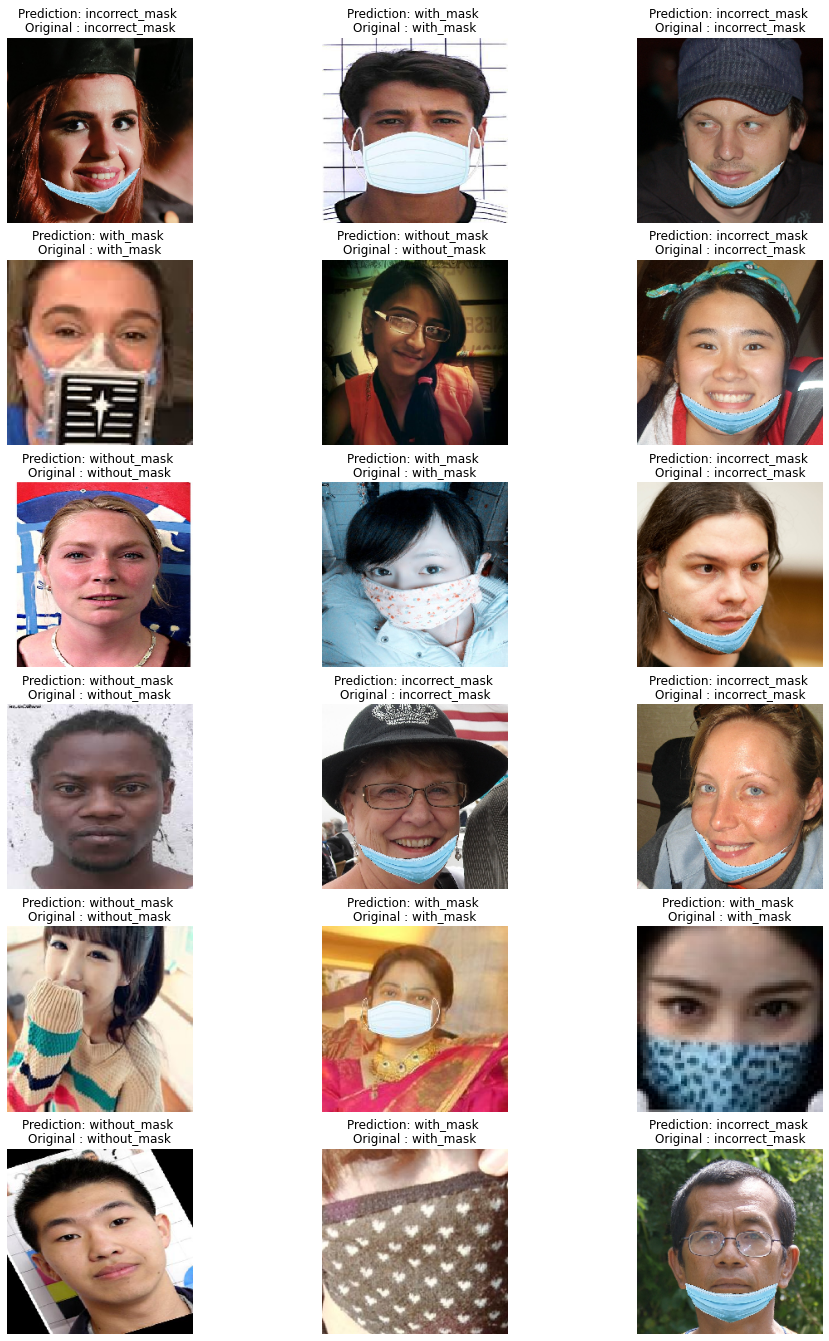

In [40]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")


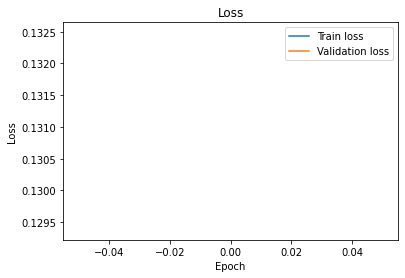

In [49]:
# loss 그래프 출력
def loss_plot(history):
    plt.plot(history.history['loss'], label = 'Train loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

loss_plot(hist)

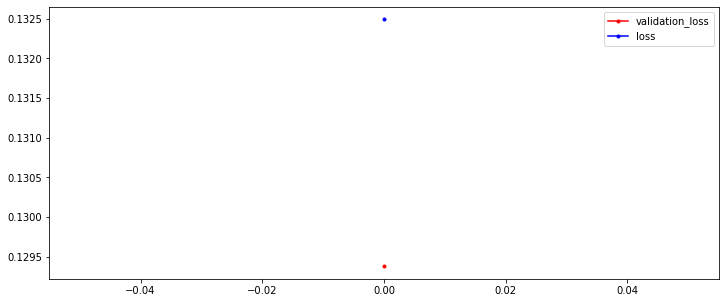

In [50]:
vloss = hist.history['val_loss'] # 테스트셋 loss
loss = hist.history['loss'] # 학습셋  

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, c='r', marker='.', label='validation_loss')
plt.plot(epoch, loss, c='b',  marker='.',label='loss')
plt.legend(loc='best')
plt.show()

In [ ]:
# Accuracy 그래프 출력
def accuracy_plot(history):
    plt.plot(hist.hist['accuracy'], label = 'Train accuracy')
    plt.plot(hist.hist['val_accuracy'], label = 'Validation accuracy')
    plt.titls('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

accuracy_plot(hist)